# PyTorch Homework

### Instructions
- Make a copy of this notebook in your own Colab and complete the questions there.
- You can add more cells if necessary. You may also add descriptions to your code, though it is not mandatory.
- Make sure the notebook can run through by *Runtime -> Run all*. **Keep all cell outputs** for grading.
- Submit the link of your notebook
- Please **enable editing or comments** so that you can receive feedback from TAs.

Install dependencies.

```bash
pip3 install ipykernel
pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
pip3 install matplotlib
```

In [1]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

## 1. Tensor Operations (40 points)

Tensor operations are important in deep learning models. In this part, you are required to implement some common tensor operations in PyTorch.

### 1) Tensor squeezing, unsqueezing and viewing

Tensor squeezing, unsqueezing and viewing are important methods to change the dimension of a Tensor, and the corresponding functions are [torch.squeeze](https://pytorch.org/docs/stable/torch.html#torch.squeeze), [torch.unsqueeze](https://pytorch.org/docs/stable/torch.html#torch.unsqueeze) and [torch.Tensor.view](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view). Please read the documents of the functions, and finish the following practice.

In [2]:
# x is a tensor with size being (3, 2)
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])
print('Original x size:', x.size())

# Add two new dimensions to x by using the function torch.unsqueeze, so that the size of x becomes (3, 1, 2, 1).
x = torch.unsqueeze(torch.unsqueeze(x, 1), -1)
print('Unsqueezed x size:', x.size())

# Remove the two dimensions justed added by using the function torch.squeeze, and change the size of x back to (3, 2).
x = torch.squeeze(x, 1).squeeze(-1)
print('Squeezed x size:', x.size())

# x is now a two-dimensional tensor, or in other words a matrix. Now use the function torch.Tensor.view and change x to a one-dimensional vector with size being (6).
x = x.view(-1)
print('One-dimensional x size:', x.size())

Original x size: torch.Size([3, 2])
Unsqueezed x size: torch.Size([3, 1, 2, 1])
Squeezed x size: torch.Size([3, 2])
One-dimensional x size: torch.Size([6])


### 2) Tensor concatenation and stack

Tensor concatenation and stack are operations to combine small tensors into big tensors. The corresponding functions are [torch.cat](https://pytorch.org/docs/stable/torch.html#torch.cat) and [torch.stack](https://pytorch.org/docs/stable/torch.html#torch.stack). Please read the documents of the functions, and finish the following practice.

In [3]:
# x is a tensor with size being (3, 2)
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])
print('x:\n\t', x)

# y is a tensor with size being (3, 2)
y = torch.Tensor([[-1, -2], [-3, -4], [-5, -6]])
print('\ny:\n\t', y)

# Our goal is to generate a tensor z with size as (2, 3, 2), and z[0,:,:] = x, z[1,:,:] = y.
z = torch.zeros(2, 3, 2)
z[0, :, :] = x
z[1, :, :] = y
print('\nz generated naively:\n\t', z)

# Use torch.stack to generate such a z
z = torch.stack((x, y), dim=0)
print('\nz generated using torch.stack:\n\t', z)

# Use torch.cat and torch.unsqueeze to generate such a z
x = torch.unsqueeze(x, dim=0)
y = torch.unsqueeze(y, dim=0)
z = torch.cat((x, y), dim=0)
print('\nz generated using torch.unsqueeze and torch.cat:\n\t', z)

x:
	 tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

y:
	 tensor([[-1., -2.],
        [-3., -4.],
        [-5., -6.]])

z generated naively:
	 tensor([[[ 1.,  2.],
         [ 3.,  4.],
         [ 5.,  6.]],

        [[-1., -2.],
         [-3., -4.],
         [-5., -6.]]])

z generated using torch.stack:
	 tensor([[[ 1.,  2.],
         [ 3.,  4.],
         [ 5.,  6.]],

        [[-1., -2.],
         [-3., -4.],
         [-5., -6.]]])

z generated using torch.unsqueeze and torch.cat:
	 tensor([[[ 1.,  2.],
         [ 3.,  4.],
         [ 5.,  6.]],

        [[-1., -2.],
         [-3., -4.],
         [-5., -6.]]])


### 3) Tensor expansion

Tensor expansion is to expand a tensor into a larger tensor along singleton dimensions. The corresponding functions are [torch.Tensor.expand](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand) and [torch.Tensor.expand_as](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.expand_as). Please read the documents of the functions, and finish the following practice.

In [4]:
# x is a tensor with size being (3)
x = torch.Tensor([1, 2, 3])
print('x:\n\t', x)

# Our goal is to generate a tensor z with size (2, 3), so that z[0,:,:] = x, z[1,:,:] = x.
z = torch.cat((x.unsqueeze(0), x.unsqueeze(0)), dim=0)
print('\nz generated naively:\n\t', z)

# Change the size of x into (1, 3) by using torch.unsqueeze.
x = x.unsqueeze(0)
print('\nUnsqueezed x with size (1, 3):\n\t', x)

# Then expand the new tensor to the target tensor by using torch.Tensor.expand.
target_size = (2, 3)
z = x.expand(target_size)
print('\nz generated using torch.Tensor.expand:\n\t', z)

x:
	 tensor([1., 2., 3.])

z generated naively:
	 tensor([[1., 2., 3.],
        [1., 2., 3.]])

Unsqueezed x with size (1, 3):
	 tensor([[1., 2., 3.]])

z generated using torch.Tensor.expand:
	 tensor([[1., 2., 3.],
        [1., 2., 3.]])


### 4) Tensor reduction in a given dimension

In deep learning, we often need to compute the mean/sum/max/min value in a given dimension of a tensor. Please read the document of [torch.mean](https://pytorch.org/docs/stable/torch.html#torch.mean), [torch.sum](https://pytorch.org/docs/stable/torch.html#torch.sum), [torch.max](https://pytorch.org/docs/stable/torch.html#torch.max), [torch.min](https://pytorch.org/docs/stable/torch.html#torch.min), [torch.topk](https://pytorch.org/docs/stable/torch.html#torch.topk), and finish the following practice.

In [5]:
# x is a random tensor with size being (10, 50)
x = torch.randn(10, 50)
print('x:\n\t', x)

# Compute the mean value for each row of x.
# You need to generate a tensor x_mean of size (10), and x_mean[k, :] is the mean value of the k-th row of x.
x_mean = x.mean(dim=1)
print('\nx_mean:\n\t', x_mean)

# Compute the sum value for each row of x.
# You need to generate a tensor x_sum of size (10).
x_sum = x.sum(dim=1)
print('\nx_sum:\n\t', x_sum)

# Compute the max value for each row of x.
# You need to generate a tensor x_max of size (10).
x_max, _ = x.max(dim=1)
print('\nx_max:\n\t', x_max)

# Compute the min value for each row of x.
# You need to generate a tensor x_min of size (10).
x_min, _ = x.min(dim=1)
print('\nx_min:\n\t', x_min)

# Compute the top-5 values for each row of x.
# You need to generate a tensor x_top of size (10, 5), and x_top[k, :] is the top-5 values of each row in x.
x_top, _ = x.topk(5, dim=1) # Compute the top-k values for each row in x
print('\nx_top:\n\t', x_top)

x:
	 tensor([[-0.0194, -1.5491,  0.6159,  1.8165,  0.1219, -0.4322,  0.2037,  0.1784,
         -0.7902,  0.6088,  2.3391,  0.2067,  1.6413, -0.3383,  0.0627, -1.2961,
         -0.0766, -1.1760,  0.3921,  0.2656, -0.4574, -0.4973,  0.3809,  0.6141,
         -0.3439,  1.9869, -0.6299, -0.8190, -0.9680,  0.2696,  0.8824,  0.0647,
         -0.1048,  0.6403, -0.5268,  1.2711, -0.5283,  0.8254, -0.2682, -2.0783,
         -0.7220, -0.5201, -0.8246,  0.0887, -0.7883,  0.3655, -0.6792, -1.2543,
          0.4908, -0.3533],
        [ 0.8676,  1.6227, -0.2919, -0.1378,  0.3575,  0.1579, -1.8878, -0.1004,
          0.0253, -0.8736,  0.4071, -1.1014, -0.3772,  0.5519, -1.4012,  0.5793,
         -1.3621, -0.6633, -0.0894, -0.9523,  0.0721,  0.5481, -1.9403, -0.0192,
          2.3251, -1.9255, -1.7014, -0.2740,  0.2292, -1.1019, -0.9042, -0.5333,
         -0.1563,  1.2717, -0.2815,  1.6727, -0.0369, -1.5241, -0.8729,  1.8750,
         -0.0883,  0.2246, -0.1562, -0.5106, -1.7361, -1.2138,  1.6514,  0.8

## Convolutional Neural Networks (60 points)



Implement a convolutional neural network for image classification on CIFAR-10 dataset.

CIFAR-10 is an image dataset of 10 categories. Each image has a size of 32x32 pixels. The following code will download the dataset, and split it into `train` and `test`.

In [6]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # define transform

train = torchvision.datasets.CIFAR10(".", train=True, download=True, transform=transform)
test = torchvision.datasets.CIFAR10(".", train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


The following code visualizes some samples in the dataset. You may use it to debug your model if necessary.

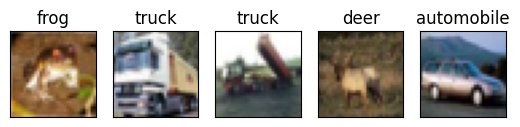

In [7]:
def plot(data, labels=None, num_sample=5):
  n = min(len(data), num_sample)
  for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(data[i], cmap="gray")
    plt.xticks([])
    plt.yticks([])
    if labels is not None:
      plt.title(labels[i])

train.labels = [train.classes[target] for target in train.targets]
plot(train.data, train.labels)

### 1) Basic CNN implementation


Consider a basic CNN model

- It has 3 convolutional layers, followed by a linear layer.
- Each convolutional layer has a kernel size of 3, a padding of 1.
- ReLU activation is applied on every hidden layer.

Please implement this model in the following section. You will need to tune the hyperparameters and fill the results in the table.

#### a) Implement convolutional layers (20 points)

Parallelize computing using CUDA using a compatible GPU

In [8]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


Implement the initialization function and the forward function of the CNN.

In [9]:
class CNN(nn.Module): # define CNN model
    def __init__(self, ch1=16, ch2=32, ch3=64):
        super().__init__()
        self.network = nn.Sequential(
            # for CNN with input dim = Di, output dim Do = [(Di - K + 2P) / S] + 1
            nn.Conv2d(3, ch1, kernel_size=3, stride=1, padding=0), # convolution layer 1
            # output dim, Do = Di - K + 1 = 32 - 3 + 1 = 30
            nn.ReLU(), # ReLU activation function
            nn.Conv2d(ch1, ch2, kernel_size=3, stride=1, padding=0), # convolution layer 2
            # output dim, Do = Di - K + 1 = 30 - 3 + 1 = 28
            nn.ReLU(), # ReLU activation function
            nn.Conv2d(ch2, ch3, kernel_size=3, stride=1, padding=0), # convolution layer 3
            # output dim, Do = Di - K + 1 = 28 - 3 + 1 = 26
            nn.ReLU(), # ReLU activation function
            nn.Flatten(), # flatten layer
            nn.Linear(ch3*26*26, 10) # output layer
        )
    
    def forward(self, x):
        return self.network(x) # define how the model is going to be run, from input to output
      
    def training_step(self, batch):
        images, labels = batch[0].to(device), batch[1].to(device) # extract features and labels from batch
        outputs = self.network(images) # generate predictions
        _, predictions = torch.max(outputs, dim=1) # convert predictions
        loss = F.cross_entropy(outputs, labels) # calculate loss
        accuracy = torch.tensor(torch.sum(predictions==labels).item()/len(predictions)) # calculate accuracy
        return loss, accuracy
    
    def testing_step(self, batch):
        images, labels = batch[0].to(device), batch[1].to(device) # extract features and labels from batch
        outputs = self.network(images) # generate predictions
        _, predictions = torch.max(outputs, dim=1) # convert predictions
        loss = F.cross_entropy(outputs, labels) # calculate loss
        accuracy = torch.tensor(torch.sum(predictions==labels).item()/len(predictions)) # calculate accuracy
        return {'test_loss': loss.detach(), 'test_accuracy': accuracy}
    
    def epoch_end(self, epoch, result):
        print("Epoch: {}    Train Loss: {:.4f}    Train Accuracy: {:.4f}    Test Loss: {:.4f}    Test Accuracy: {:.4f}".format(
              epoch+1, result['train_loss'], result['train_accuracy'], result['test_loss'], result['test_accuracy'])) # print training stats at end of each epoch

Implement the fit function and the evaluate function of the CNN.

In [10]:
@torch.no_grad()
def evaluate(model, test_loader):
    model.eval()
    outputs = [model.testing_step(batch) for batch in test_loader] # model predictions
    batch_losses = [x['test_loss'] for x in outputs] # batch losses
    epoch_loss = torch.stack(batch_losses).mean() # combine losses
    batch_accuracies = [x['test_accuracy'] for x in outputs] # batch accuracies
    epoch_accuracy = torch.stack(batch_accuracies).mean() # combine accuracies
    return {'test_loss': epoch_loss.item(), 'test_accuracy': epoch_accuracy.item()}

def fit(model, train_loader, test_loader, epochs, lr, optimizer):
    print("Started Training!\n\n")
    history = [] # list of model training/testing history
    optimizer = optimizer(model.parameters(), lr) # optimizer
    for epoch in range(epochs): # loop for epochs
        # training stage
        model.train() # set model to training mode
        train_losses = [] # initialize list for training losses
        train_accuracies = [] # initialize list for training losses
        for batch in train_loader: # loop for batches
            # forward propagation
            loss, accuracy = model.training_step(batch)
            # loss computation
            train_losses.append(loss)
            train_accuracies.append(accuracy)
            # backward propagation
            optimizer.zero_grad() # reset gradients to zero
            loss.backward() # calculate gradients
            # parameter update
            optimizer.step() # step in the direction of steepest descent
        # testing stage
        result = evaluate(model, test_loader) # run predictions over test dataset batch to add testing loss and accuracy to result
        result['train_loss'] = torch.stack(train_losses).mean().item() # add training loss to result
        result['train_accuracy'] = torch.stack(train_accuracies).mean().item() # add training accuracy to result
        model.epoch_end(epoch, result) # print training and testing loss and accuracy at the end of each epoch
        history.append(result) # add results to history buffer
    print("\n\nFinished Training!")
    return history

Implement the plot_accuracies function and the plot_losses function of the CNN.

In [11]:
def plot_accuracies(history):
    """ Plot the history of accuracies in each epoch"""
    train_accuracies = [x.get('train_accuracy') for x in history] # get train accuracies
    test_accuracies = [x['test_accuracy'] for x in history] # get test accuracies
    plt.plot(train_accuracies, '-bx') # plot train accuracies
    plt.plot(test_accuracies, '-rx') # plot test accuracies
    plt.xlabel('Epoch') # label for x-axis
    plt.ylabel('Accuracy') # label for y-axis
    plt.legend(['Training', 'Testing']) # legend
    plt.title('Accuracy Curves') # title
    plt.show() # show plot

def plot_losses(history):
    """ Plot the history of losses in each epoch"""
    train_losses = [x.get('train_loss') for x in history] # get train losses
    test_losses = [x['test_loss'] for x in history] # get test losses
    plt.plot(train_losses, '-bx')  # plot train losses
    plt.plot(test_losses, '-rx') # plot test losses
    plt.xlabel('Epoch') # label for x-axis
    plt.ylabel('Loss') # label for y-axis
    plt.legend(['Training', 'Testing']) # legend
    plt.title('Loss Curves') # title 
    plt.show() # show plot

Define hyperparameters.

In [12]:
num_epochs = 9 # number of epochs
num_workers = 2 # number of sub-processes to use for data loading
batch_size = 64 # batch size
learning_rate = 0.0001 # learning rate
optimizer = optim.Adam # optimizer

Train the CNN model on CIFAR-10 dataset.

CNN(
  (network): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=43264, out_features=10, bias=True)
  )
)

Started Training!


Epoch: 1    Train Loss: 1.6167    Train Accuracy: 0.4229    Test Loss: 1.4145    Test Accuracy: 0.4951
Epoch: 2    Train Loss: 1.3447    Train Accuracy: 0.5232    Test Loss: 1.3200    Test Accuracy: 0.5286
Epoch: 3    Train Loss: 1.2463    Train Accuracy: 0.5598    Test Loss: 1.2611    Test Accuracy: 0.5519
Epoch: 4    Train Loss: 1.1768    Train Accuracy: 0.5862    Test Loss: 1.1950    Test Accuracy: 0.5797
Epoch: 5    Train Loss: 1.1159    Train Accuracy: 0.6089    Test Loss: 1.1595    Test Accuracy: 0.5894
Epoch: 6    Train Loss: 1.0695    Train Accuracy: 0.6262    Test Loss: 1.1477    Test Accuracy: 0.5

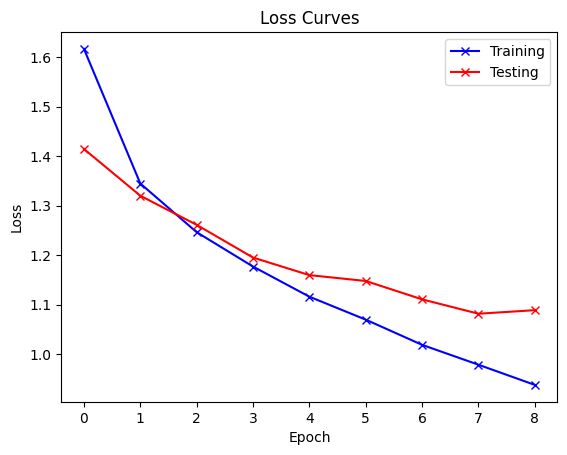

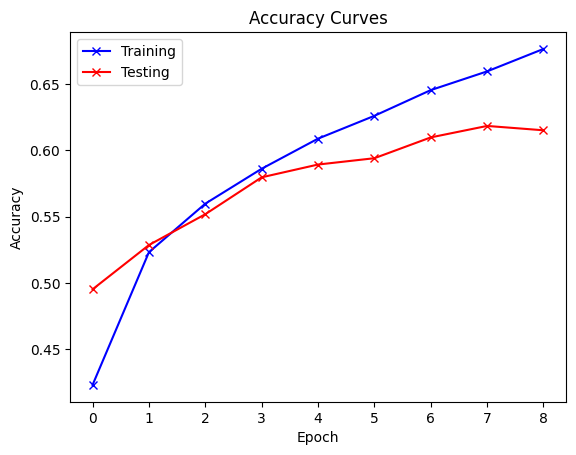

In [13]:
train_loader = DataLoader(train, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=torch.cuda.is_available()) # training dataset loader
test_loader = DataLoader(test, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=torch.cuda.is_available()) # testing dataset loader

base_cnn = CNN() # base model object
base_cnn.to(device)
print(base_cnn) # print the CNN model
print()

base_history = fit(base_cnn, train_loader, test_loader, num_epochs, learning_rate, optimizer) # train (and test) the model

plot_losses(base_history) # loss curves
plot_accuracies(base_history) # accuracy curves

torch.save(base_cnn.state_dict(), 'base_cnn.pt')

#### b) Tune hyperparameters (20 points)


Tune the number of channels, optimizer, learning rate and the number of epochs for best validation accuracy.

**Hint:** You may need more epochs for SGD than Adam.

Latin Hypercube Sampling (LHS) was performed to sample a few yet meaningful non-repetative samples (spanning the entire sample space) for hyperprameters in an efficient way (as opposed to full factorial sampling). Following are the 4 sampled sets of hyperparameters for analysing the effects of their variations on training and validation of the CNN.

| Hyperparameter      | Model  1        | Model 2      | Model 3        | Model 4       |
|---------------------|-----------------|--------------|----------------|---------------|
| # Channels          | (128, 256, 512) | (16, 32, 64) | (64, 128, 256) | (32, 64, 128) |
| # Optimizer         | Adam            | Adagrad      | RMSprop        | SGD           |
| Learning Rate       | 0.00001         | 0.00005      | 0.0001         | 0.0005        |
| # Epochs            | 20              | 15           | 10             | 25            |

In [14]:
param_set_1 = np.array([128, 256, 512, optim.Adam, 0.00001, 20]) # hyperparameters for model 1
param_set_2 = np.array([16, 32, 64, optim.Adagrad, 0.00005, 15]) # hyperparameters for model 2
param_set_3 = np.array([64, 128, 256, optim.RMSprop, 0.0001, 10]) # hyperparameters for model 3
param_set_4 = np.array([32, 64, 128, optim.SGD, 0.0005, 25]) # hyperparameters for model 4

Model 1

CNN(
  (network): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=346112, out_features=10, bias=True)
  )
)

Started Training!


Epoch: 1    Train Loss: 1.6711    Train Accuracy: 0.4056    Test Loss: 1.4485    Test Accuracy: 0.4894
Epoch: 2    Train Loss: 1.3791    Train Accuracy: 0.5131    Test Loss: 1.3302    Test Accuracy: 0.5249
Epoch: 3    Train Loss: 1.2823    Train Accuracy: 0.5494    Test Loss: 1.2727    Test Accuracy: 0.5511
Epoch: 4    Train Loss: 1.2227    Train Accuracy: 0.5723    Test Loss: 1.2410    Test Accuracy: 0.5569
Epoch: 5    Train Loss: 1.1752    Train Accuracy: 0.5894    Test Loss: 1.1982    Test Accuracy: 0.5785
Epoch: 6    Train Loss: 1.1307    Train Accuracy: 0.6063    Test Loss: 1.1759    Test Accurac

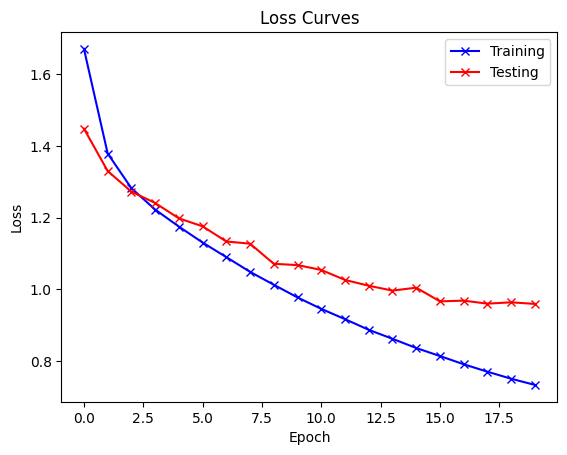

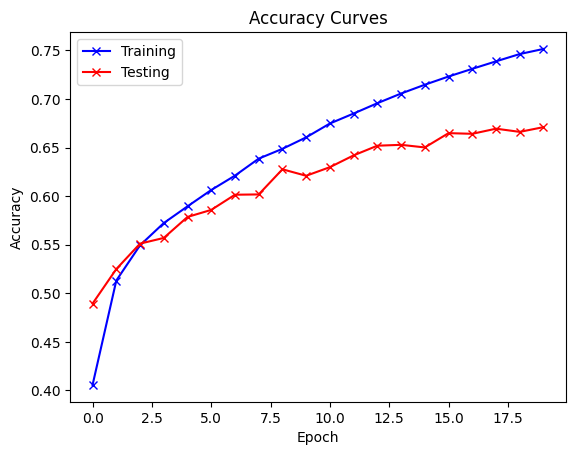

In [15]:
cnn_model_1 = CNN(param_set_1[0], param_set_1[1], param_set_1[2]) # CNN model 1 object
cnn_model_1.to(device)
print(cnn_model_1) # print the CNN model
print()

history_1 = fit(cnn_model_1,
                train_loader,
                test_loader,
                optimizer=param_set_1[3],
                lr=param_set_1[4],
                epochs=param_set_1[5]) # train (and test) the model

plot_losses(history_1) # loss curves
plot_accuracies(history_1) # accuracy curves

torch.save(cnn_model_1.state_dict(), 'cnn_model_1.pt')

Model 2

CNN(
  (network): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=43264, out_features=10, bias=True)
  )
)

Started Training!


Epoch: 1    Train Loss: 2.1384    Train Accuracy: 0.2646    Test Loss: 2.0462    Test Accuracy: 0.3060
Epoch: 2    Train Loss: 2.0121    Train Accuracy: 0.3101    Test Loss: 1.9688    Test Accuracy: 0.3273
Epoch: 3    Train Loss: 1.9532    Train Accuracy: 0.3279    Test Loss: 1.9219    Test Accuracy: 0.3458
Epoch: 4    Train Loss: 1.9139    Train Accuracy: 0.3405    Test Loss: 1.8905    Test Accuracy: 0.3559
Epoch: 5    Train Loss: 1.8854    Train Accuracy: 0.3488    Test Loss: 1.8662    Test Accuracy: 0.3604
Epoch: 6    Train Loss: 1.8635    Train Accuracy: 0.3553    Test Loss: 1.8454    Test Accuracy: 0.3

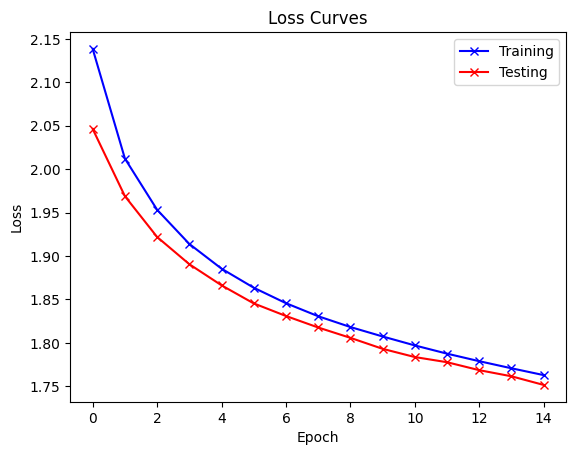

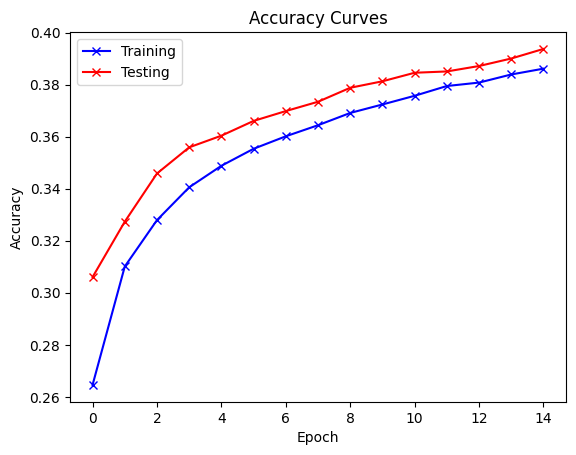

In [16]:
cnn_model_2 = CNN(param_set_2[0], param_set_2[1], param_set_2[2]) # CNN model 2 object
cnn_model_2.to(device)
print(cnn_model_2) # print the CNN model
print()

history_2 = fit(cnn_model_2,
                train_loader,
                test_loader,
                optimizer=param_set_2[3],
                lr=param_set_2[4],
                epochs=param_set_2[5]) # train (and test) the model

plot_losses(history_2) # loss curves
plot_accuracies(history_2) # accuracy curves

torch.save(cnn_model_2.state_dict(), 'cnn_model_2.pt')

Model 3

CNN(
  (network): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=173056, out_features=10, bias=True)
  )
)

Started Training!


Epoch: 1    Train Loss: 1.4064    Train Accuracy: 0.5006    Test Loss: 1.3496    Test Accuracy: 0.5196
Epoch: 2    Train Loss: 1.0544    Train Accuracy: 0.6331    Test Loss: 1.1705    Test Accuracy: 0.5852
Epoch: 3    Train Loss: 0.8835    Train Accuracy: 0.6948    Test Loss: 1.1720    Test Accuracy: 0.6100
Epoch: 4    Train Loss: 0.7654    Train Accuracy: 0.7381    Test Loss: 1.0159    Test Accuracy: 0.6482
Epoch: 5    Train Loss: 0.6651    Train Accuracy: 0.7749    Test Loss: 0.8883    Test Accuracy: 0.6986
Epoch: 6    Train Loss: 0.5673    Train Accuracy: 0.8092    Test Loss: 1.0727    Test Accuracy:

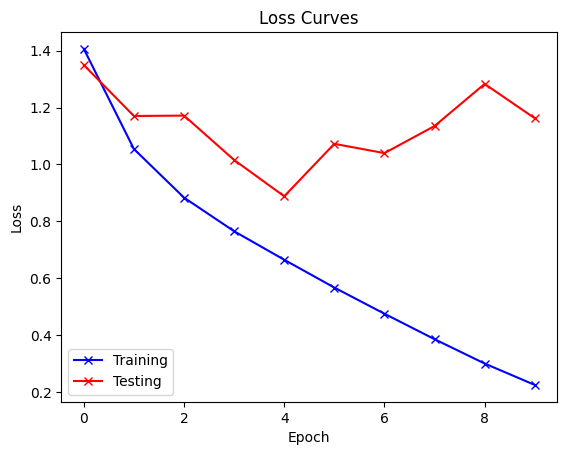

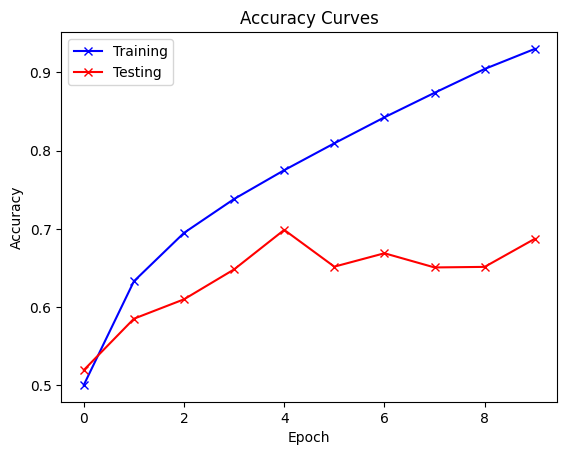

In [17]:
cnn_model_3 = CNN(param_set_3[0], param_set_3[1], param_set_3[2]) # CNN model 3 object
cnn_model_3.to(device)
print(cnn_model_3) # print the CNN model
print()

history_3 = fit(cnn_model_3,
                train_loader,
                test_loader,
                optimizer=param_set_3[3],
                lr=param_set_3[4],
                epochs=param_set_3[5]) # train (and test) the model

plot_losses(history_3) # loss curves
plot_accuracies(history_3) # accuracy curves

torch.save(cnn_model_3.state_dict(), 'cnn_model_3.pt')

Model 4

CNN(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=86528, out_features=10, bias=True)
  )
)

Started Training!


Epoch: 1    Train Loss: 2.2560    Train Accuracy: 0.1729    Test Loss: 2.1859    Test Accuracy: 0.2762
Epoch: 2    Train Loss: 2.0992    Train Accuracy: 0.2839    Test Loss: 2.0141    Test Accuracy: 0.3129
Epoch: 3    Train Loss: 1.9728    Train Accuracy: 0.3158    Test Loss: 1.9168    Test Accuracy: 0.3377
Epoch: 4    Train Loss: 1.8928    Train Accuracy: 0.3375    Test Loss: 1.8534    Test Accuracy: 0.3600
Epoch: 5    Train Loss: 1.8416    Train Accuracy: 0.3556    Test Loss: 1.8152    Test Accuracy: 0.3731
Epoch: 6    Train Loss: 1.8047    Train Accuracy: 0.3697    Test Loss: 1.7818    Test Accuracy: 0.

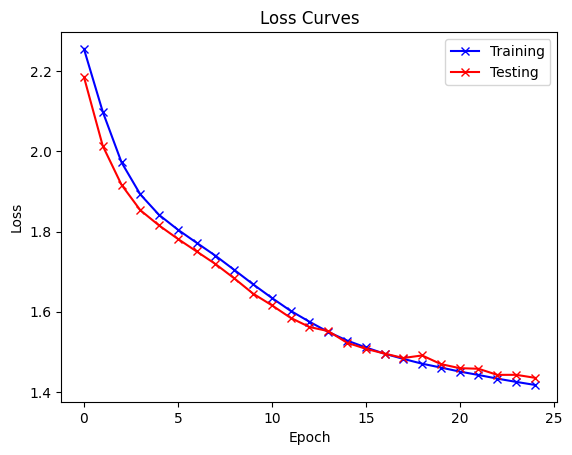

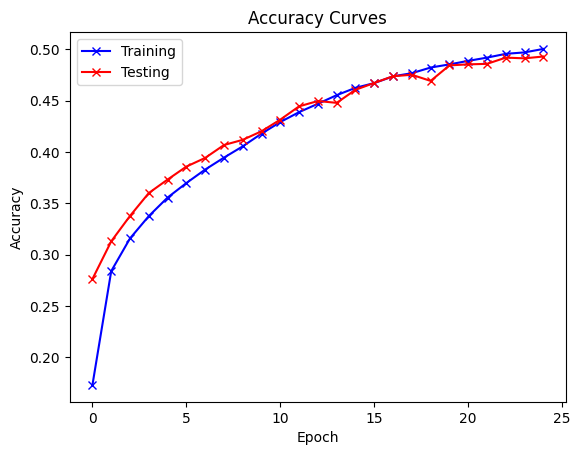

In [18]:
cnn_model_4 = CNN(param_set_4[0], param_set_4[1], param_set_4[2]) # CNN model 4 object
cnn_model_4.to(device)
print(cnn_model_4) # print the CNN model
print()

history_4 = fit(cnn_model_4,
                train_loader,
                test_loader,
                optimizer=param_set_4[3],
                lr=param_set_4[4],
                epochs=param_set_4[5]) # train (and test) the model

plot_losses(history_4) # loss curves
plot_accuracies(history_4) # accuracy curves

torch.save(cnn_model_4.state_dict(), 'cnn_model_4.pt')

Write down **validation accuracy** of your model under different hyperparameter settings.

| Model               | Training Loss | Training Accuracy | Validation Loss | Validation Accuracy |
|---------------------|---------------|-------------------|-----------------|---------------------|
| Base Model          | 0.9377        | 0.6767            | 1.0887          | 0.6152              |
| Model 1             | 0.7332        | 0.7515            | **0.9594**      | 0.6710              |
| Model 2             | 1.7629        | 0.3861            | 1.7516          | 0.3937              |
| Model 3             | **0.2250**    | **0.9298**        | 1.1627          | **0.6872**          |
| Model 4             | 1.4172        | 0.5004            | 1.4351          | 0.4930              |

#### c) Use larger CNN model (20 points)

Add more Convolution/BatchNorm/Pooling/DropOut/Linear layers to improve the accuracy. Higher accuracy will get higher grade.

In [19]:
class ComplexCNN(nn.Module): # define CNN model
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=0), # convolution layer 1
            nn.ReLU(), # ReLU activation function
            nn.BatchNorm2d(32), # batch normalization
            nn.Dropout(p=0.2), # dropout

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0), # convolution layer 2
            nn.ReLU(), # ReLU activation function
            nn.BatchNorm2d(64), # batch normalization
            # nn.MaxPool2d((2, 2)), # max pooling

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=0), # convolution layer 3
            nn.ReLU(), # ReLU activation function
            nn.BatchNorm2d(128), # batch normalization
            # nn.MaxPool2d((2, 2)), # max pooling

            nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=0), # convolution layer 4
            nn.ReLU(), # ReLU activation function
            nn.BatchNorm2d(64), # batch normalization
            # nn.MaxPool2d((4, 4)), # max pooling
            nn.Dropout(p=0.2), # dropout

            nn.Flatten(), # flatten layer
            nn.Linear(36864, 256), # linear layer
            nn.Dropout(p=0.1), # dropout
            nn.Linear(256, 10), # output layer
        )
    
    def forward(self, x):
        return self.network(x) # define how the model is going to be run, from input to output
      
    def training_step(self, batch):
        images, labels = batch[0].to(device), batch[1].to(device) # extract features and labels from batch
        outputs = self.network(images) # generate predictions
        _, predictions = torch.max(outputs, dim=1) # convert predictions
        loss = F.cross_entropy(outputs, labels) # calculate loss
        accuracy = torch.tensor(torch.sum(predictions==labels).item()/len(predictions)) # calculate accuracy
        return loss, accuracy
    
    def testing_step(self, batch):
        images, labels = batch[0].to(device), batch[1].to(device) # extract features and labels from batch
        outputs = self.network(images) # generate predictions
        _, predictions = torch.max(outputs, dim=1) # convert predictions
        loss = F.cross_entropy(outputs, labels) # calculate loss
        accuracy = torch.tensor(torch.sum(predictions==labels).item()/len(predictions)) # calculate accuracy
        return {'test_loss': loss.detach(), 'test_accuracy': accuracy}
    
    def epoch_end(self, epoch, result):
        print("Epoch: {}    Train Loss: {:.4f}    Train Accuracy: {:.4f}    Test Loss: {:.4f}    Test Accuracy: {:.4f}".format(
              epoch+1, result['train_loss'], result['train_accuracy'], result['test_loss'], result['test_accuracy'])) # print training stats at end of each epoch

In [24]:
num_epochs = 20 # number of epochs
num_workers = 2 # number of sub-processes to use for data loading
batch_size = 8 # batch size
learning_rate = 0.00005 # learning rate
optimizer = optim.Adam # optimizer

ComplexCNN(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): Dropout(p=0.2, inplace=False)
    (14): Flatten(start_dim=1, end_dim=-1)
    (15): Linear(in_features=36864, out_features=256, bias=True)
    (16): Dropout(p=0.1, inplace=False)
    (17): Linear(in_features=256, out_features=10, bias=True)
  )
)

Starte

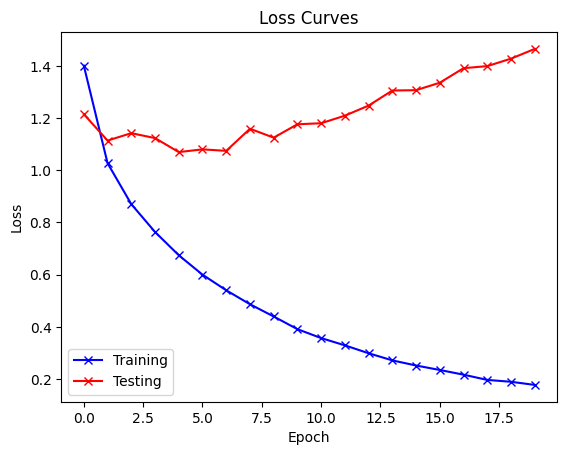

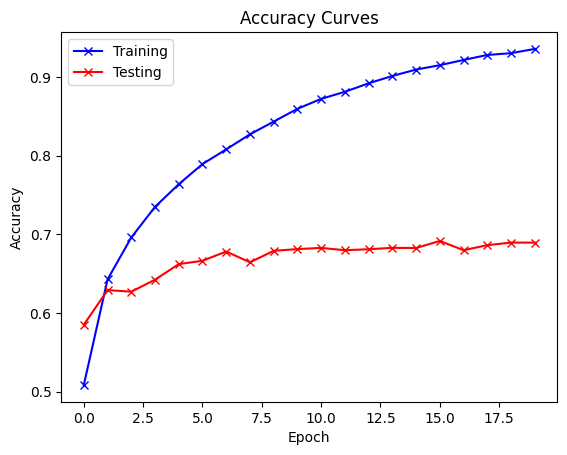

In [25]:
complex_cnn = ComplexCNN() # complex CNN model object
complex_cnn.to(device)
print(complex_cnn) # print the CNN model
print()

complex_history = fit(complex_cnn,
                      train_loader,
                      test_loader,
                      optimizer=optimizer,
                      lr=learning_rate,
                      epochs=num_epochs) # train (and test) the model

plot_losses(complex_history) # loss curves
plot_accuracies(complex_history) # accuracy curves

torch.save(complex_cnn.state_dict(), 'complex_cnn.pt')

The training (93.58%) and validation (68.96%) accuracies of this model are the best amongst the various models trained using different hyperparameters discussed earlier.